In [2]:
%matplotlib inline
from utils import *
from tqdm import *
from matplotlib import pyplot as plt
from skimage.measure import block_reduce
import numpy as np
import librosa

In [2]:
samples = np.load('data/28k/samples.npy')

In [62]:
sr = 44100
n_fft = 512
hop_length = n_fft / 3
window = np.hanning(n_fft)
amps = []
for sample in tqdm(samples, leave=True):
    y = samples[np.random.randint(len(samples))]
    S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window=window, center=False)
    amp = librosa.logamplitude(np.abs(S)**2)
    amp = amp[:256,:256] # ignore last time step and highest frequency
    amp = block_reduce(amp, (8,8), func=np.sum)
    amp -= amp.min()
    amp /= amp.max()
    amps.append(amp)

100%|██████████| 28488/28488 [01:31<00:00, 312.22it/s]


In [87]:
np.save('data/28k/images.npy', amps)
# amps = np.load('data/28k/images.npy')

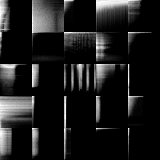

In [5]:
show_array(255 * make_mosaic(amps, n=5))